01 Importing libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

02 Importing pickle file

In [2]:
# create a path
path = r'C:\Users\peter\Documents\04-2024 Instacart Basket Analysis'

In [3]:
# Importing orders_products_customers_aggregated.pkl
df_complete = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
# looking at the head to determing PII data to remove
df_complete.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


I will remove first name and surname because of privacy reasons.
I will remove _merge too as I do not need it.

In [5]:
# Removing first_Name  columns
df_complete = df_complete.drop(columns = ['first_name'])

In [6]:
# Removing surname column
df_complete = df_complete.drop(columns = ['surname'])

In [7]:
# Removing _merge column
df_complete = df_complete.drop(columns = ['_merge'])

In [8]:
# doublecheck
df_complete.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
# The next two lines are just info for myself for coding
df_complete.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income'],
      dtype='object')

In [10]:
print(df_complete['frequency_flag'].head())

0    Regular customer
1    Regular customer
2    Regular customer
3    Regular customer
4    Regular customer
Name: frequency_flag, dtype: object


# The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
# creating the regions


In [12]:
result = []

for value in df_complete["state"]:
  if (value == 'Maine') or ( value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
    result.append("region 1, Northeast")
  elif (value =='Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value =='Nebraska') or (value =='Kansas') or (value =='Minnesota') or (value =='Iowa') or (value =='Missouri'):
    result.append("region 2, Midwest")
  elif (value =='Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value =='Virginia') or (value =='West Virginia') or (value =='North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value =='Florida') or (value =='Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):  
    result.append("region 3, South")  
  elif (value =='Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value =='Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
    result.append("region 4, West")
  else:
    result.append("NaN")

In [13]:
#viewing the results
result

['region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',
 'region 3, South',


In [14]:
# creating new column to store region information in dataframe
df_complete['region'] = result

In [15]:
# checking information
df_complete['region'].value_counts(dropna = False)

region
region 3, South        10791885
region 4, West          8292913
region 2, Midwest       7597325
region 1, Northeast     5722736
Name: count, dtype: int64

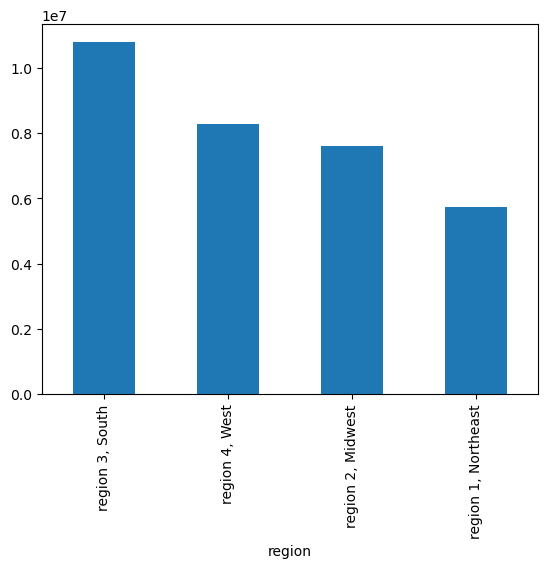

In [16]:
bar1 = df_complete['region'].value_counts().plot.bar()

In [17]:
# Creating crosstab between regions and spender_flag
crosstab = pd.crosstab(df_complete['region'], df_complete['spender_flag'], dropna = False)

In [18]:
# checking crosstab
crosstab

spender_flag,High_spender,Low_spender
region,,
"region 1, Northeast",108225,5614511
"region 2, Midwest",155975,7441350
"region 3, South",209691,10582194
"region 4, West",160354,8132559


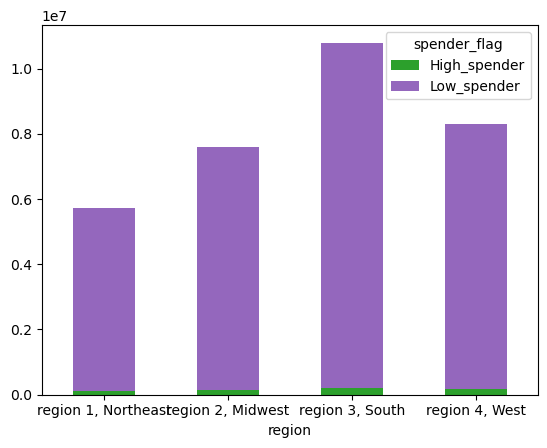

In [19]:
#plotting bar chart
spender_flag_vs_region = crosstab.plot(kind="bar", stacked=True, rot=0, color=['#2ca02c', '#9467bd'])



The south region has the biggest amount of lower senders.

In [20]:
# Creating crosstab between regions and frequency flag
crosstab1 = pd.crosstab(df_complete['region'], df_complete['frequency_flag'], dropna = False)

In [21]:
#  checking crosstab1
crosstab1

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
region,,,
"region 1, Northeast",4022241,469934,1230561
"region 2, Midwest",5304364,640082,1652879
"region 3, South",7601261,897977,2292647
"region 4, West",5862657,678735,1751521


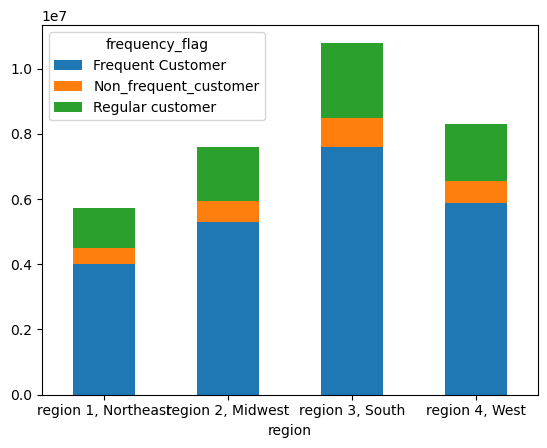

In [22]:
#plotting bar chart (stacked)
regionvsfreq= crosstab1.plot(kind="bar", stacked=True, rot=0)

# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# categorizing using loc (max_order <= 4)
df_complete.loc[(df_complete['max_order'] <= 4 ) , 'low_activity_flag'] = 'Low activity customer'

In [24]:
# categorizing using loc (max_order >= 5)
df_complete.loc[(df_complete['max_order'] >= 5 ) , 'low_activity_flag'] = 'Regular activity customer'

In [25]:
#checking categorization counts
df_complete['low_activity_flag'].value_counts(dropna = False)

low_activity_flag
Regular activity customer    30964564
Low activity customer         1440295
Name: count, dtype: int64

In [26]:
# Creating exclusion subset
df_complete_Regular_activity_customer =  df_complete[df_complete['low_activity_flag']=='Regular activity customer']

In [27]:
#checking categorization counts
df_complete_Regular_activity_customer ['low_activity_flag'].value_counts(dropna = False)

low_activity_flag
Regular activity customer    30964564
Name: count, dtype: int64

In [28]:
# Exporting this subset as a PKL file
df_complete_Regular_activity_customer.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'regular_custs.pkl'))

# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [29]:
# dividing customers into age groups, Age range 18-35 = Young Adult, Age range 35-64 = Adult, Age range greater than 64 = Senior, to to divide ages of customers
df_complete.loc[(df_complete['age'] >= 18) & (df_complete['age'] <= 35), 'Age_Range'] = 'Young Adult'
df_complete.loc[(df_complete['age'] > 35) & (df_complete['age'] <= 64), 'Age_Range'] = 'Adult'
df_complete.loc[(df_complete['age'] > 64), 'Age_Range'] = 'Seniors'
df_complete['Age_Range'].value_counts()   
 

Age_Range
Adult          14683356
Young Adult     9146419
Seniors         8575084
Name: count, dtype: int64

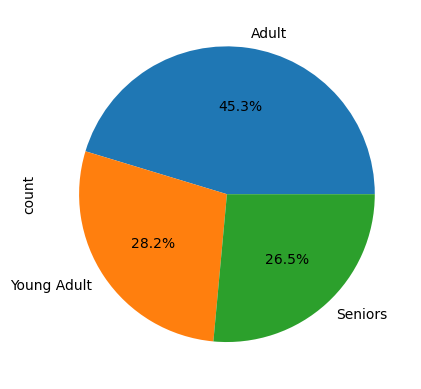

In [30]:
# creating a pie chart with percents
pie_chart = df_complete['Age_Range'].value_counts().plot.pie(autopct='%1.1f%%')

As we can see Adults (age between 35-64 has the highest customer count 

In [31]:
#Creating a crosstab to show the divisions in all age range categories across the regional divisions in the USA 
crosstab2 = pd.crosstab(df_complete['Age_Range'], df_complete['region'], dropna = False)

In [32]:
# checking crosstab2
crosstab2

region,"region 1, Northeast","region 2, Midwest","region 3, South","region 4, West"
Age_Range,,,,
Adult,2545530,3491746,4868567,3777513
Seniors,1553903,1990844,2836257,2194080
Young Adult,1623303,2114735,3087061,2321320


In [33]:
# Doing the same with percentages
crosstab3 = pd.crosstab(df_complete['region'], df_complete['Age_Range'], normalize='index').multiply(100).round(4)


In [34]:
crosstab3

Age_Range,Adult,Seniors,Young Adult
region,,,
"region 1, Northeast",44.4810,27.1531,28.3659
"region 2, Midwest",45.9602,26.2045,27.8353
"region 3, South",45.1132,26.2814,28.6054
"region 4, West",45.5511,26.4573,27.9916


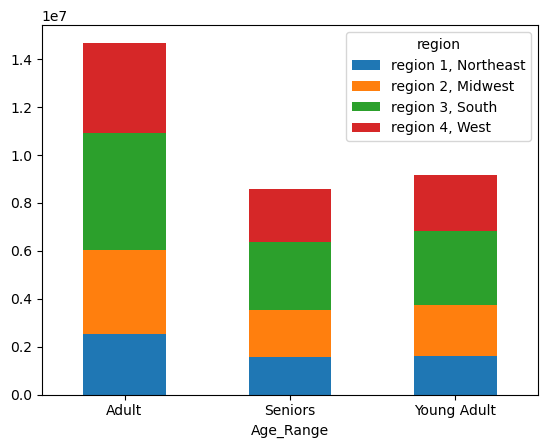

In [35]:
#plotting bar chart (stacked)
regionsvsagerange= crosstab2.plot(kind="bar", stacked=True, rot=0)

In [36]:
# Dividing income into brackets; $32,048 or less "Poor, $32,048-$53,413 Lower-middle class, $53,413-$106,827 Middle class, $106,827-373,894 Upper-middle class, $373,894 and up Wealthy
# creating income flags
df_complete.loc[df_complete['income']<32048, 'income_flag'] = 'Poor'
df_complete.loc[(df_complete['income']>=32048) & (df_complete['income']<=53413), 'income_flag'] = 'Lower Middle Class' 
df_complete.loc[(df_complete['income']>53413) & (df_complete['income']<=106827), 'income_flag'] = 'Middle Class'
df_complete.loc[(df_complete['income']>106827) & (df_complete['income']<=373894), 'income_flag'] = 'Middle Class'
df_complete.loc[df_complete['income']>373894, 'income_flag'] = 'Wealthy'
df_complete['income_flag'].value_counts(dropna = False)

income_flag
Middle Class          28057885
Lower Middle Class     3764233
Poor                    523753
Wealthy                  58988
Name: count, dtype: int64

In [37]:
#Creating a crosstab to show the divisions in all age range categories across the income brackets
crosstab4 = pd.crosstab(df_complete['Age_Range'], df_complete['income_flag'], dropna = False)

In [38]:
crosstab4

income_flag,Lower Middle Class,Middle Class,Poor,Wealthy
Age_Range,,,,
Adult,1460444,13008623,180475,33814
Seniors,733526,7735632,85252,20674
Young Adult,1570263,7313630,258026,4500


In [39]:
# Creating a crosstab with percentages of the same information above
crosstab5 = pd.crosstab(df_complete['Age_Range'], df_complete['income_flag'], normalize='index').multiply(100).round(4)


In [40]:
crosstab5

income_flag,Lower Middle Class,Middle Class,Poor,Wealthy
Age_Range,,,,
Adult,9.9463,88.5943,1.2291,0.2303
Seniors,8.5542,90.2106,0.9942,0.2411
Young Adult,17.1681,79.9617,2.8211,0.0492


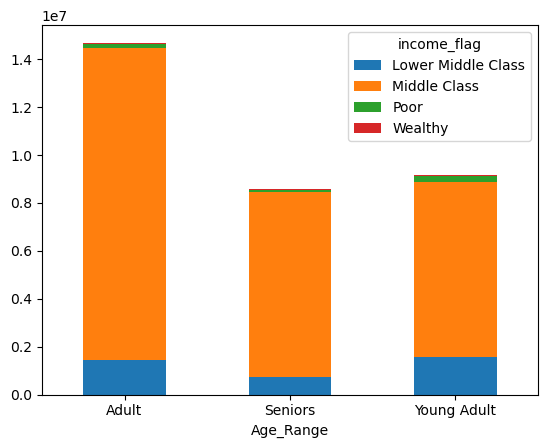

In [41]:
#plotting bar chart (stacked)
agerange_vs_class= crosstab4.plot(kind="bar", stacked=True, rot=0)

In [42]:
# Dividing time of day into its own categories; 12:00 am - 05:59 am = overnight, 06:00 - 11:59 morning, 12:00 pm - 04:59 pm = afternoon, 05:00 pm - 07:59 pm = evening,08:00 pm - 11:59 pm = night  
       
df_complete.loc[(df_complete['order_hour_of_day'] > 0) & (df_complete['order_hour_of_day'] < 6), 'time_of_day'] = 'overnight'
df_complete.loc[(df_complete['order_hour_of_day'] >= 6) & (df_complete['order_hour_of_day'] < 12), 'time_of_day'] = 'morning'
df_complete.loc[(df_complete['order_hour_of_day'] >= 12) & (df_complete['order_hour_of_day'] < 17), 'time_of_day'] = 'afternoon'
df_complete.loc[(df_complete['order_hour_of_day'] >= 17) & (df_complete['order_hour_of_day'] < 20), 'time_of_day'] = 'evening'
df_complete.loc[(df_complete['order_hour_of_day'] >= 20) & (df_complete['order_hour_of_day'] < 24), 'time_of_day'] = 'night'
df_complete['time_of_day'].value_counts()

time_of_day
afternoon    13165968
morning      10851768
evening       4982461
night         2808334
overnight      377559
nan            218769
Name: count, dtype: int64

In [43]:
# Creating crosstab between income flag and age range
crosstab6 = pd.crosstab(df_complete['income_flag'], df_complete['Age_Range'], dropna = False)

In [44]:
crosstab6

Age_Range,Adult,Seniors,Young Adult
income_flag,,,
Lower Middle Class,1460444,733526,1570263
Middle Class,13008623,7735632,7313630
Poor,180475,85252,258026
Wealthy,33814,20674,4500


In [45]:
# Creating subsets of Age Range
df_Young_adults =  df_complete[df_complete['Age_Range']=='Young Adult']
df_Adults =  df_complete[df_complete['Age_Range']=='Adult']
df_Seniors =  df_complete[df_complete['Age_Range']=='Seniors']

Generate a suitable visualization to illustrate the distribution of profiles.

In [46]:
df_Young_adults.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9146419 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  average_spend           float64
 20  spender_flag            object 
 21  Customer_frequency      float64
 22

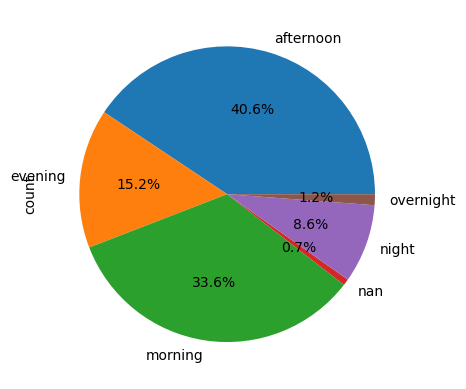

In [47]:
# Creating a pie chart of time of day in the young adult category
pie_chart1 = df_Young_adults['time_of_day'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')


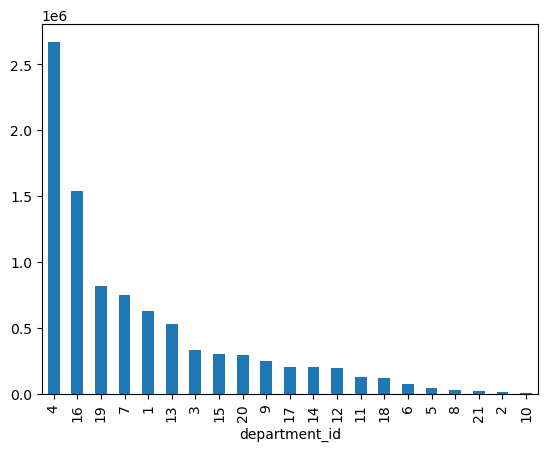

In [48]:
# creating bar chart of dep id in young adult category
bar2 = df_Young_adults['department_id'].value_counts().plot.bar()

Young adult orders from department_id 4 and 16 mostly. --> Produce and Diary Eggs

In [49]:
# Importing orders_products_customers_aggregated.pkl
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [50]:
df_departments.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


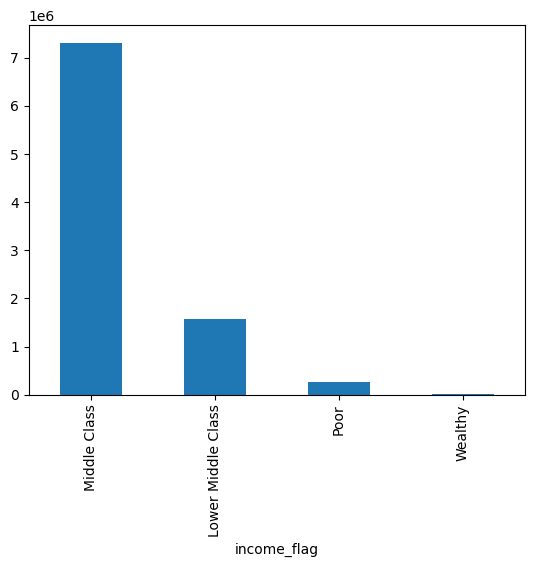

In [51]:
# creating bar chart of time of day in young adult category
bar3 = df_Young_adults['income_flag'].value_counts().plot.bar()

The most of the young adults are in the middle class category

In [52]:
# Marking the above prices above 100 as missing
df_Young_adults.loc[df_Young_adults['prices'] >100, 'prices'] = np.nan

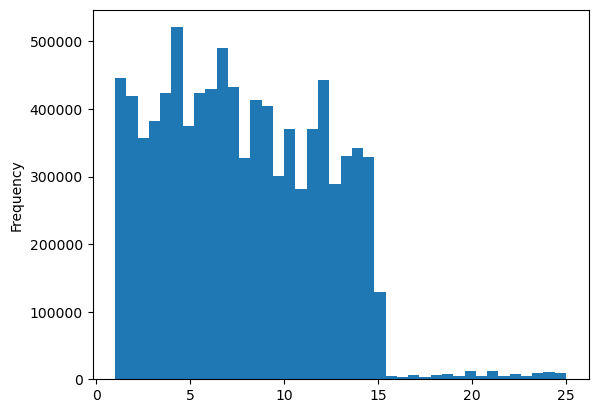

In [53]:
# Histogram young adult prices
hist1 = df_Young_adults['prices'].plot.hist(bins = 40)

Young adults typically spend less than $15 per order.

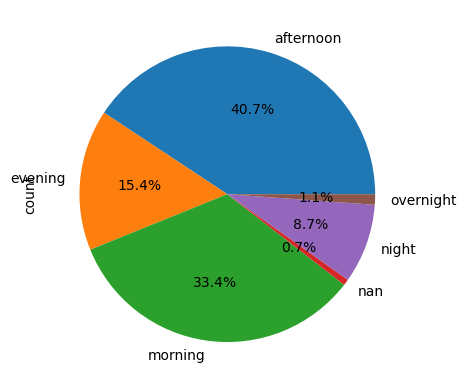

In [54]:
# Creating a pie chart of time of day in the adult category
pie_chart2 = df_Adults['time_of_day'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

Adults mostly ordering in the afternoon 40,7% and in the morning 33,4%

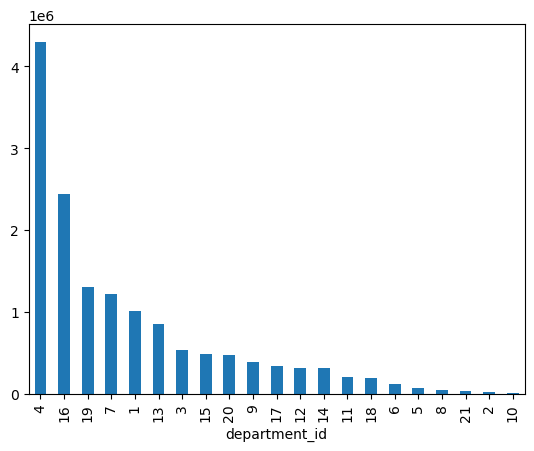

In [55]:
# creating bar chart of time of day in the adult category
bar4 = df_Adults['department_id'].value_counts().plot.bar()

Adult orders from department_id 4 and 16 mostly. --> Produce and Diary Eggs

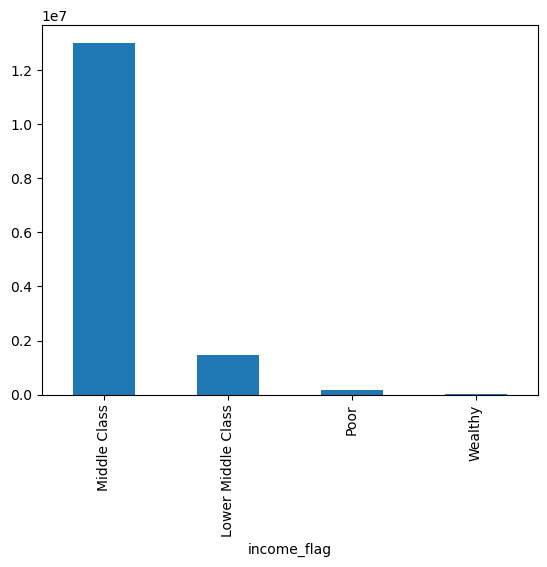

In [56]:
# creating bar chart of time of day in the adult category
bar5 = df_Adults['income_flag'].value_counts().plot.bar()

MOst of the Adults are in the middle class category

In [57]:
# Marking the above prices above 100 as missing
df_Adults.loc[df_Adults['prices'] >100, 'prices'] = np.nan

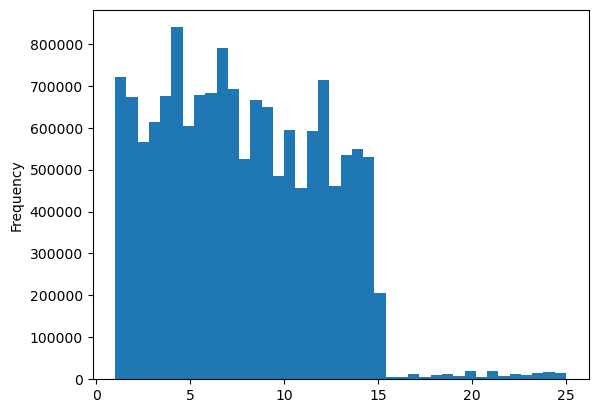

In [58]:
# histogram on what adults spend
hist2 = df_Adults['prices'].plot.hist(bins = 40)

Adults typically spend less than $15 per order.

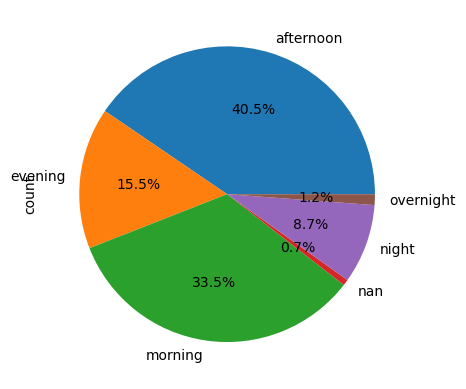

In [59]:
# Creating a pie chart of time of day in the adult category
pie_chart3 = df_Seniors['time_of_day'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')

Seniors mostly ordering in the afternoon 40,5% and in the morning 33,5%

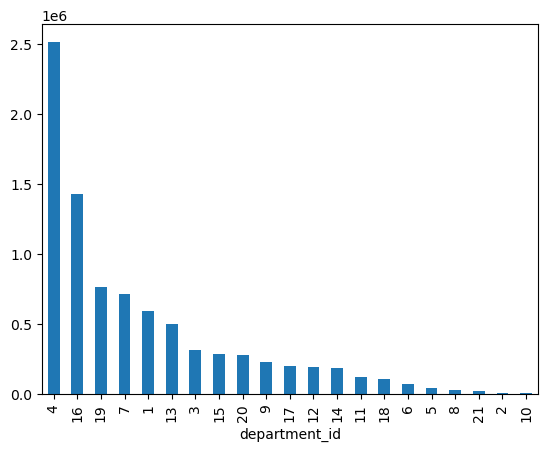

In [60]:
# creating bar chart of department id in the senior category
bar6 = df_Seniors['department_id'].value_counts().plot.bar()

Seniors orders from department_id 4 and 16 mostly. --> Produce and Diary Eggs


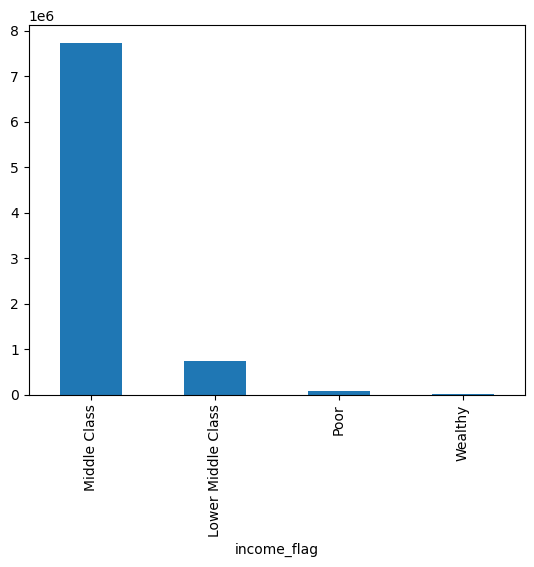

In [61]:
# creating bar chart of income flag in the senior
bar7 = df_Seniors['income_flag'].value_counts().plot.bar()

MOst of the Seniors are in the middle class category

In [62]:
# Marking the above prices above 100 as missing
df_Seniors.loc[df_Seniors['prices'] >100, 'prices'] = np.nan

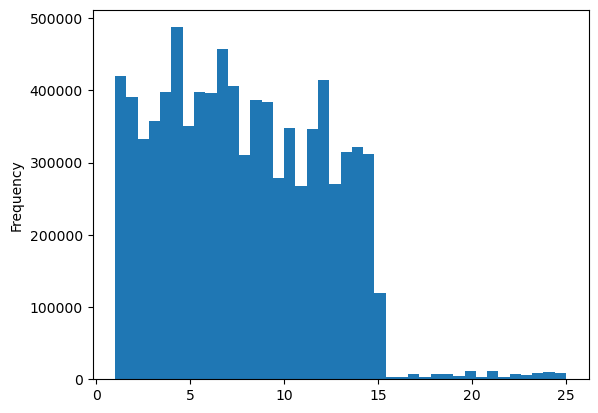

In [63]:
# histogram on what Seniors spend
hist3 = df_Seniors['prices'].plot.hist(bins = 40)

Seniors typically spend less than $15 per order.

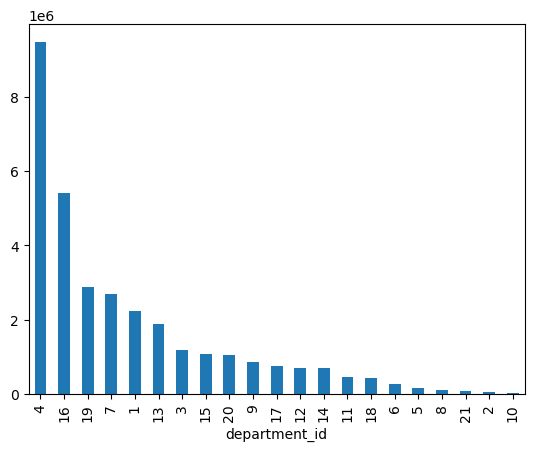

In [64]:
# overall department_id data
bar8 = df_complete['department_id'].value_counts().plot.bar()

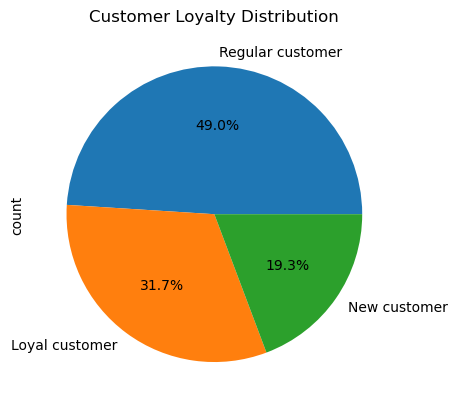

In [65]:
# Customer loyalty distribution
pie_chart4 = df_complete['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%', title='Customer Loyalty Distribution')


In [66]:
#Showing counts of each category
df_complete['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [67]:
#looking at customer frequency column counts 
df_complete['frequency_flag'].value_counts()

frequency_flag
Frequent Customer        22790523
Regular customer          6927608
Non_frequent_customer     2686728
Name: count, dtype: int64

In [68]:
df_complete.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,marital_status,income,region,low_activity_flag,Age_Range,income_flag,time_of_day
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,"region 3, South",Regular activity customer,Young Adult,Lower Middle Class,morning
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,"region 3, South",Regular activity customer,Young Adult,Lower Middle Class,morning
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,"region 3, South",Regular activity customer,Young Adult,Lower Middle Class,afternoon
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,"region 3, South",Regular activity customer,Young Adult,Lower Middle Class,morning
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,"region 3, South",Regular activity customer,Young Adult,Lower Middle Class,afternoon


In [69]:
# Creating crosstab between loyalty flag and  frequency flag
crosstab7 = pd.crosstab(df_complete['loyalty_flag'], df_complete['frequency_flag'], dropna = False)

In [70]:
crosstab7

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
loyalty_flag,,,
Loyal customer,10281575,0,2518
New customer,2242253,2025953,1975784
Regular customer,10266695,660775,4949306


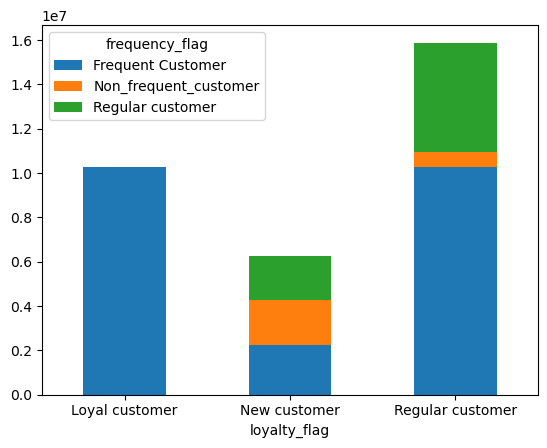

In [71]:
#plotting bar chart
loyalvsfreq= crosstab7.plot(kind="bar", stacked=True, rot=0)

# Create an appropriate visualization to show the distribution of profiles.

In [72]:
df_Young_adults.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_spend,Customer_frequency,age,n_dependants,income
count,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.144942e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06,9.146419e+06
mean,1.711323e+06,1.030590e+05,1.710673e+01,2.730554e+00,1.340504e+01,1.086045e+01,2.558515e+04,8.408846e+00,5.895940e-01,7.120187e+01,9.936948e+00,7.785081e+00,3.298262e+01,1.212518e+01,9.772072e+00,2.650352e+01,1.504931e+00,7.049027e+04
std,9.875047e+05,5.960269e+04,1.747881e+01,2.088960e+00,4.248005e+00,8.545465e+00,1.407753e+04,7.187291e+00,4.919074e-01,3.822419e+01,6.284211e+00,4.238617e+00,2.508263e+01,9.380971e+01,6.346938e+00,5.192528e+00,1.118032e+00,2.521301e+04
min,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.591100e+04
25%,8.564610e+05,5.093800e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.356000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.386010e+00,6.000000e+00,2.200000e+01,1.000000e+00,5.593500e+04
50%,1.710364e+06,1.031410e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.524600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.817197e+00,7.000000e+00,2.700000e+01,2.000000e+00,6.903400e+04
75%,2.566488e+06,1.548810e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.791700e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.120000e+01,4.700000e+01,8.245455e+00,1.200000e+01,3.100000e+01,3.000000e+00,8.463100e+04
max,3.421077e+06,2.062060e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.090000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.250692e+04,3.000000e+01,3.500000e+01,3.000000e+00,3.963640e+05


In [73]:
df_Seniors[['income', 'average_spend']].describe()

,income,average_spend
count,8.575084e+06,8.575084e+06
mean,1.155889e+05,1.176885e+01
std,4.209520e+04,7.368684e+01
min,2.900100e+04,1.000000e+00
25%,9.540600e+04,7.393333e+00
50%,1.160590e+05,7.830374e+00
75%,1.431900e+05,8.262373e+00
max,5.939010e+05,1.404251e+04


In [74]:
df_Adults[['income', 'average_spend']].describe()

,income,average_spend
count,1.468336e+07,1.468336e+07
mean,1.080371e+05,1.201337e+01
std,4.373052e+04,8.148315e+01
min,2.590300e+04,1.000000e+00
25%,7.775900e+04,7.384178e+00
50%,1.078480e+05,7.825314e+00
75%,1.375860e+05,8.254801e+00
max,5.924090e+05,2.500542e+04


I was not able to describe the complett dataframe because of memory issues. But here is a comparison

In [75]:

# Calculate descriptive statistics
seniors_stats = df_Seniors[['income', 'average_spend']].describe()
adults_stats = df_Adults[['income', 'average_spend']].describe()
young_adults_stats = df_Young_adults[['income', 'average_spend']].describe()



In [76]:
# Rename columns for clarity
seniors_stats.columns = pd.MultiIndex.from_product([['Seniors'], seniors_stats.columns])
adults_stats.columns = pd.MultiIndex.from_product([['Adults'], adults_stats.columns])
young_adults_stats.columns = pd.MultiIndex.from_product([['Young Adults'], young_adults_stats.columns])

In [77]:
# Concatenate the statistics DataFrames
combined_stats = pd.concat([seniors_stats, adults_stats, young_adults_stats], axis=1)

In [78]:
## Display the combined statistics
print(combined_stats)

            Seniors                      Adults                Young Adults  \
             income average_spend        income average_spend        income   
count  8.575084e+06  8.575084e+06  1.468336e+07  1.468336e+07  9.146419e+06   
mean   1.155889e+05  1.176885e+01  1.080371e+05  1.201337e+01  7.049027e+04   
std    4.209520e+04  7.368684e+01  4.373052e+04  8.148315e+01  2.521301e+04   
min    2.900100e+04  1.000000e+00  2.590300e+04  1.000000e+00  2.591100e+04   
25%    9.540600e+04  7.393333e+00  7.775900e+04  7.384178e+00  5.593500e+04   
50%    1.160590e+05  7.830374e+00  1.078480e+05  7.825314e+00  6.903400e+04   
75%    1.431900e+05  8.262373e+00  1.375860e+05  8.254801e+00  8.463100e+04   
max    5.939010e+05  1.404251e+04  5.924090e+05  2.500542e+04  3.963640e+05   

                     
      average_spend  
count  9.146419e+06  
mean   1.212518e+01  
std    9.380971e+01  
min    1.000000e+00  
25%    7.386010e+00  
50%    7.817197e+00  
75%    8.245455e+00  
max    1.25

In [79]:
from IPython.display import display

# Display the combined statistics
display(combined_stats)

Seniors                      Adults                Young Adults  \
             income average_spend        income average_spend        income   
count  8.575084e+06  8.575084e+06  1.468336e+07  1.468336e+07  9.146419e+06   
mean   1.155889e+05  1.176885e+01  1.080371e+05  1.201337e+01  7.049027e+04   
std    4.209520e+04  7.368684e+01  4.373052e+04  8.148315e+01  2.521301e+04   
min    2.900100e+04  1.000000e+00  2.590300e+04  1.000000e+00  2.591100e+04   
25%    9.540600e+04  7.393333e+00  7.775900e+04  7.384178e+00  5.593500e+04   
50%    1.160590e+05  7.830374e+00  1.078480e+05  7.825314e+00  6.903400e+04   
75%    1.431900e+05  8.262373e+00  1.375860e+05  8.254801e+00  8.463100e+04   
max    5.939010e+05  1.404251e+04  5.924090e+05  2.500542e+04  3.963640e+05   

                     
      average_spend  
count  9.146419e+06  
mean   1.212518e+01  
std    9.380971e+01  
min    1.000000e+00  
25%    7.386010e+00  
50%    7.817197e+00  
75%    8.245455e+00  
max    1.250692e+04

In [80]:
# checking columns
df_complete.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'region', 'low_activity_flag', 'Age_Range',
       'income_flag', 'time_of_day'],
      dtype='object')

In [81]:
# checking columns
df_complete.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'region', 'low_activity_flag', 'Age_Range',
       'income_flag', 'time_of_day'],
      dtype='object')

In [82]:
#trying to solve memory issues
import gc

gc.collect()


43

In [83]:
# Step 1: Select relevant columns
selected_columns = df_complete[['prices', 'region', 'user_id', 'order_id']]


In [84]:
# Step 2: Group by region
grouped_by_region = selected_columns.groupby(['region'])


In [85]:
# Step 3: Aggregate data
aggregated_data = grouped_by_region.agg({
    'prices': 'sum',
    'user_id': pd.Series.nunique,
    'order_id': pd.Series.nunique
})

In [86]:
# Step 4: Rename columns for clarity
aggregated_data.rename(columns={
    'prices': 'sum of sales',
    'user_id': 'unique_users',
    'order_id': 'unique_orders'
}, inplace=True)

In [87]:
# Step 5: Assign to df_region
df_region = aggregated_data

In [88]:
# Step 6: Display the resulting DataFrame
print(df_region)

                     sum of sales  unique_users  unique_orders
region                                                        
region 1, Northeast    44530105.8         36388         567162
region 2, Midwest      59192977.7         48519         754275
region 3, South        84107910.4         68737        1071562
region 4, West         64595126.7         52565         821686


In [92]:
# Step 4: Rename columns for clarity
df_region.rename(columns={
    'sum of sales': 'sum_of_sales',
    'unique_users': 'customers_count',
    'unique_orders': 'orders_placed'
}, inplace=True)

In [93]:
# Step 6: Display the resulting DataFrame
print(df_region)

                     sum_of_sales  customers_count  orders_placed
region                                                           
region 1, Northeast    44530105.8            36388         567162
region 2, Midwest      59192977.7            48519         754275
region 3, South        84107910.4            68737        1071562
region 4, West         64595126.7            52565         821686


In [94]:
# creating new column: average price per customer
df_region['avg_price_per_customer'] = df_region['sum_of_sales']/df_region['customers_count']

In [95]:
# creating new column: average orders placed by customer
df_region['avg_orders_per_customer'] = df_region['orders_placed']/df_region['customers_count']

In [96]:
# creating new column: average price per order
df_region['avg_price_per_order'] = df_region['sum_of_sales']/df_region['orders_placed'] 

In [97]:
# Step 6: Display the resulting DataFrame
print(df_region)

                     sum_of_sales  customers_count  orders_placed  \
region                                                              
region 1, Northeast    44530105.8            36388         567162   
region 2, Midwest      59192977.7            48519         754275   
region 3, South        84107910.4            68737        1071562   
region 4, West         64595126.7            52565         821686   

                     avg_price_per_customer  avg_orders_per_customer  \
region                                                                 
region 1, Northeast             1223.757992                15.586512   
region 2, Midwest               1219.995830                15.545972   
region 3, South                 1223.619163                15.589304   
region 4, West                  1228.861918                15.631808   

                     avg_price_per_order  
region                                    
region 1, Northeast            78.513909  
region 2, Midwest      

In [98]:
display(df_region)

,sum_of_sales,customers_count,orders_placed,avg_price_per_customer,avg_orders_per_customer,avg_price_per_order
region,,,,,,
"region 1, Northeast",44530105.8,36388,567162,1223.757992,15.586512,78.513909
"region 2, Midwest",59192977.7,48519,754275,1219.995830,15.545972,78.476653
"region 3, South",84107910.4,68737,1071562,1223.619163,15.589304,78.490942
"region 4, West",64595126.7,52565,821686,1228.861918,15.631808,78.612909


In [99]:
# sorting data by price per customer 
df_region.sort_values(by='avg_price_per_customer', ascending=False)

,sum_of_sales,customers_count,orders_placed,avg_price_per_customer,avg_orders_per_customer,avg_price_per_order
region,,,,,,
"region 4, West",64595126.7,52565,821686,1228.861918,15.631808,78.612909
"region 1, Northeast",44530105.8,36388,567162,1223.757992,15.586512,78.513909
"region 3, South",84107910.4,68737,1071562,1223.619163,15.589304,78.490942
"region 2, Midwest",59192977.7,48519,754275,1219.995830,15.545972,78.476653


The WEST comes out as the highest price per customer.

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [100]:
#trying to solve memory issues
import gc

gc.collect()


977

In [101]:
#  Select the columns to compare customer profiles and regions
region_column = df_complete['region']
income_flag_column = df_complete['income_flag']

In [102]:
#  Create the crosstab
crosstab8 = pd.crosstab(region_column, income_flag_column, dropna=False)

In [103]:
#  Display the crosstab
print(crosstab8)

income_flag          Lower Middle Class  Middle Class    Poor  Wealthy
region                                                                
region 1, Northeast              677921       4949251   85790     9774
region 2, Midwest                874646       6577595  125524    19560
region 3, South                 1269230       9324681  183132    14842
region 4, West                   942436       7206358  129307    14812


In [104]:
#  Create the DataFrame
data = {
    'Lower Middle Class': [677921, 874646, 1269230, 942436],
    'Middle Class': [4949251, 6577595, 9324681, 7206358],
    'Poor': [85790, 125524, 183132, 129307],
    'Wealthy': [9774, 19560, 14842, 14812]
}
regions = ['region 1, Northeast', 'region 2, Midwest', 'region 3, South', 'region 4, West']
df = pd.DataFrame(data, index=regions)

In [105]:
# Calculate Percentages
df_percent = df.div(df.sum(axis=1), axis=0) * 100

In [106]:
#  Display the Result
print(df_percent)

                     Lower Middle Class  Middle Class      Poor   Wealthy
region 1, Northeast           11.846099     86.484000  1.499108  0.170792
region 2, Midwest             11.512552     86.577776  1.652213  0.257459
region 3, South               11.760967     86.404562  1.696942  0.137529
region 4, West                11.364354     86.897789  1.559247  0.178610


MIddle Class dominites all regions

In [107]:
# Select the columns to check different behaviours
region_column = df_complete['region']
time_of_day_column = df_complete['time_of_day']

In [108]:
#trying to solve memory issues
import gc

gc.collect()


0

In [109]:
# Create the crosstab
crosstab_region_time_of_day = pd.crosstab(region_column, time_of_day_column, dropna=False)

In [110]:
#Display the crosstab
print(crosstab_region_time_of_day)

time_of_day          afternoon  evening  morning    nan   night  overnight
region                                                                    
region 1, Northeast    2330301   872797  1912667  38557  500315      68099
region 2, Midwest      3081725  1176741  2534998  50748  664309      88804
region 3, South        4364674  1662004  3631010  73297  934773     126127
region 4, West         3389268  1270919  2773093  56167  708937      94529


In [111]:
# create dataframe
data = {
    'afternoon': [2330301, 3081725, 4364674, 3389268],
    'evening': [872797, 1176741, 1662004, 1270919],
    'morning': [1912667, 2534998, 3631010, 2773093],
    'nan': [38557, 50748, 73297, 56167],
    'night': [500315, 664309, 934773, 708937],
    'overnight': [68099, 88804, 126127, 94529]
}
regions = ['region 1, Northeast', 'region 2, Midwest', 'region 3, South', 'region 4, West']
df = pd.DataFrame(data, index=regions)

In [112]:
#Calculate Percentages
df_percent = df.div(df.sum(axis=1), axis=0) * 100

In [113]:
#Display the resulting DataFrame
print(df_percent)

                     afternoon    evening    morning       nan     night  \
region 1, Northeast  40.720051  15.251394  33.422248  0.673751  8.742584   
region 2, Midwest    40.563290  15.488886  33.366981  0.667972  8.743986   
region 3, South      40.444037  15.400498  33.645744  0.679186  8.661814   
region 4, West       40.869451  15.325363  33.439311  0.677289  8.548709   

                     overnight  
region 1, Northeast   1.189973  
region 2, Midwest     1.168885  
region 3, South       1.168721  
region 4, West        1.139877  


Afternoon dominates in all regions and this followed by morning.

In [114]:
#trying to solve memory issues
gc.collect()


0

In [115]:
df_complete.columns


Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'region', 'low_activity_flag', 'Age_Range',
       'income_flag', 'time_of_day'],
      dtype='object')

In [120]:
#trying to solve memory issues
gc.collect()


1110

In [121]:
df_Young_adults.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Young_Adults.pkl'))

In [122]:
df_Adults.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Adults.pkl'))

In [123]:
df_Seniors.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Seniors.pkl'))

In [124]:
df_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_region.pkl'))

In [125]:
# Exporting visualizations
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions.png'))


In [126]:
spender_flag_vs_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender_flag_vs_region.png'))

In [127]:
regionvsfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionvsfreq'))

In [128]:
pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agerange'))

In [129]:
regionsvsagerange.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionsvsagerange'))

In [130]:
agerange_vs_class.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agerange_vs_class'))

In [131]:
pie_chart1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'young_adults_time_of_day'))

In [132]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'young_adults_department'))

In [133]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'young_adults_income_flag'))

In [134]:
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'young_adults_prices'))

In [135]:
pie_chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'adults_time_of_day'))

In [136]:
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'adults_department'))

In [137]:
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'adults_income_flag'))

In [138]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'adults_prices'))

In [139]:
pie_chart3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'seniors_time_of_day'))

In [140]:
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'seniors_department'))

In [141]:
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'seniors_income_flag'))

In [142]:
hist3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'seniors_prices'))

In [143]:
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'complete_departement'))

In [144]:
pie_chart4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty_distribution'))


In [145]:
loyalvsfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalvsfreq'))


In [147]:
#trying to solve memory issues
gc.collect()



0

In [ ]:
df_complete.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Final_full_combined.pkl'))